In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf  # ✅ Using soundfile instead of librosa.output.write_wav

# ✅ Paths
input_dataset = "/content/drive/MyDrive/Indian_Musician_Dataset"
output_dataset = "/content/drive/MyDrive/Indian_Musician_Dataset_Preprocessed"
os.makedirs(output_dataset, exist_ok=True)

# ✅ Fixed settings
SAMPLE_RATE = 22050  # Standard for deep learning models
FIXED_DURATION = 10  # Extract only 10 seconds per song
NUM_SAMPLES = SAMPLE_RATE * FIXED_DURATION  # Total samples for 10 sec clip

def preprocess_audio(audio_path, output_path):
    """
    Loads an audio file, normalizes it, trims silence,
    extracts a random 10-sec clip, and saves it.
    """
    # Load full audio
    y, sr = librosa.load(audio_path, sr=SAMPLE_RATE)

    # Normalize & Trim Silence
    y = librosa.util.normalize(y)
    y, _ = librosa.effects.trim(y)

    # 🔹 Pick a random 10-sec segment (instead of first 10 sec)
    if len(y) > NUM_SAMPLES:
        start_sample = random.randint(0, len(y) - NUM_SAMPLES)
        y = y[start_sample: start_sample + NUM_SAMPLES]
    else:
        y = np.pad(y, (0, NUM_SAMPLES - len(y)))  # Pad with silence if too short

    # Save Processed Audio using soundfile
    sf.write(output_path, y, sr)
    return y, sr

def save_mel_spectrogram(y, sr, output_path):
    """
    Converts an audio signal to a Mel-Spectrogram and saves it as an image.
    """
    # Convert to Mel Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Save as Image
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
    plt.axis("off")  # No axis for a clean spectrogram

    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# ✅ Process Each Artist & Song
for artist in os.listdir(input_dataset):
    artist_folder = os.path.join(input_dataset, artist)
    output_artist_folder = os.path.join(output_dataset, artist)
    os.makedirs(output_artist_folder, exist_ok=True)

    for song in os.listdir(artist_folder):
        if song.endswith(".mp3"):
            song_path = os.path.join(artist_folder, song)
            output_audio_path = os.path.join(output_artist_folder, song.replace(".mp3", "_processed.wav"))
            output_spectrogram_path = os.path.join(output_artist_folder, song.replace(".mp3", "_spectrogram.png"))

            print(f"Processing: {song} from {artist}...")
            y, sr = preprocess_audio(song_path, output_audio_path)
            save_mel_spectrogram(y, sr, output_spectrogram_path)

print("✅ Preprocessing Complete! All songs are 10 seconds long with spectrograms saved.")

Processing: Dil Se Niklegi - The Legend of Bhagat Singh (2002) - Full Song.mp3 from Shankar_Mahadevan...
Processing: Jee Karda (Official Full Song) ｜ Badlapur ｜ Varun Dhawan & Yami Gautam.mp3 from Shankar_Mahadevan...
Processing: Shankar Mahadevan live - Locha-e-ulfat.mp3 from Shankar_Mahadevan...
Processing: Pehli Baar - Siddharth Mahadevan-MTV Unplugged, Season-5, Episode-4 (Audio).mp3 from Shankar_Mahadevan...
Processing: Bhoomi Mangalam (Pandit Ravi Shankar) ｜ Kruti Dance Academy.mp3 from Shankar_Mahadevan...
Processing: Tera zikar baton main hai. (new song movie Phir 2009).mp3 from Shankar_Mahadevan...
Processing: Hey Kaala Bandar Lyrical｜Abhishek Bachchan.mp3 from Shankar_Mahadevan...
Processing: Pyaar ke pal live｜ six strings live｜ a small tribute for the legend KK｜ @yabeshedwin1310.mp3 from Shankar_Mahadevan...
Processing: Brahmastra Rasiya Reprise Live by Tushar's Live!.mp3 from Shankar_Mahadevan...
Processing: Maa (Song) ｜ Taare Zameen Par ｜ Shankar Mahadevan.mp3 from Shankar

✅ Total Artists Processed: 11
🎵 Shankar_Mahadevan: 61 songs processed.
✅ Shankar_Mahadevan has matching spectrograms for each audio file.
🎵 Lata_Mangeshkar: 61 songs processed.
✅ Lata_Mangeshkar has matching spectrograms for each audio file.
🎵 Kishore_Kumar: 61 songs processed.
✅ Kishore_Kumar has matching spectrograms for each audio file.
🎵 Arijit_Singh: 61 songs processed.
✅ Arijit_Singh has matching spectrograms for each audio file.
🎵 Shreya_Ghoshal: 61 songs processed.
✅ Shreya_Ghoshal has matching spectrograms for each audio file.
🎵 A.R._Rahman: 61 songs processed.
✅ A.R._Rahman has matching spectrograms for each audio file.
🎵 Alka_Yagnik: 61 songs processed.
✅ Alka_Yagnik has matching spectrograms for each audio file.
🎵 Neha_Kakkar: 61 songs processed.
✅ Neha_Kakkar has matching spectrograms for each audio file.
🎵 Asha_Bhosle: 61 songs processed.
✅ Asha_Bhosle has matching spectrograms for each audio file.
🎵 Sonu_Nigam: 61 songs processed.
✅ Sonu_Nigam has matching spectrograms f

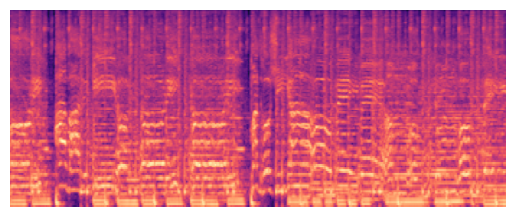

In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
import soundfile as sf

# ✅ Path to the preprocessed dataset
output_dataset = "/content/Indian_Musician_Dataset_Preprocessed"

# ✅ Check artist folders
artists = os.listdir(output_dataset)
print(f"✅ Total Artists Processed: {len(artists)}")

# ✅ Check each artist's folder
for artist in artists:
    artist_folder = os.path.join(output_dataset, artist)

    if os.path.isdir(artist_folder):
        files = os.listdir(artist_folder)

        # ✅ Count number of songs processed
        audio_files = [f for f in files if f.endswith("_processed.wav")]
        spectrogram_files = [f for f in files if f.endswith("_spectrogram.png")]

        print(f"🎵 {artist}: {len(audio_files)} songs processed.")

        # ✅ Ensure each audio has a spectrogram
        if len(audio_files) == len(spectrogram_files):
            print(f"✅ {artist} has matching spectrograms for each audio file.")
        else:
            print(f"⚠️ WARNING: {artist} has missing spectrograms!")

# ✅ Check audio duration
def check_audio_duration(audio_path):
    y, sr = librosa.load(audio_path, sr=22050)
    duration = librosa.get_duration(y=y, sr=sr)
    return round(duration, 2)  # Round to 2 decimal places

print("\n⏳ Checking audio duration...")
for artist in artists:
    artist_folder = os.path.join(output_dataset, artist)
    audio_files = [f for f in os.listdir(artist_folder) if f.endswith("_processed.wav")]

    if audio_files:
        sample_audio = os.path.join(artist_folder, audio_files[0])
        duration = check_audio_duration(sample_audio)
        print(f"🎶 Sample {audio_files[0]} from {artist} → {duration} sec")

        if duration == 10.0:
            print(f"✅ Audio duration is correct for {artist}.\n")
        else:
            print(f"⚠️ WARNING: {artist} has incorrect audio length!\n")

# ✅ Check spectrograms visually
def show_spectrogram(image_path):
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

print("\n🖼️ Checking sample spectrogram...")
sample_artist = artists[0]  # Pick first artist
sample_spectrograms = [f for f in os.listdir(os.path.join(output_dataset, sample_artist)) if f.endswith("_spectrogram.png")]

if sample_spectrograms:
    sample_image_path = os.path.join(output_dataset, sample_artist, sample_spectrograms[0])
    print(f"Displaying spectrogram: {sample_image_path}")
    show_spectrogram(sample_image_path)
else:
    print(f"⚠️ No spectrogram found for {sample_artist}.")

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# ✅ Paths
data_dir = "/content/Indian_Musician_Dataset_Preprocessed"
IMG_SIZE = (128, 128)  # Resize all spectrograms to 128x128

# ✅ Load Images & Labels
X, y, labels = [], [], []

# Read all artist folders
for artist_idx, artist in enumerate(os.listdir(data_dir)):
    artist_folder = os.path.join(data_dir, artist)

    if os.path.isdir(artist_folder):  # Only process directories
        for file in os.listdir(artist_folder):
            if file.endswith("_spectrogram.png"):  # Only load spectrograms
                file_path = os.path.join(artist_folder, file)

                # Load & preprocess image
                img = load_img(file_path, target_size=IMG_SIZE)
                img_array = img_to_array(img) / 255.0  # Normalize pixel values

                # Append to dataset
                X.append(img_array)
                y.append(artist_idx)  # Numeric label for musician
                labels.append(artist)  # Store label names

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# ✅ Convert Labels to One-Hot Encoding
num_classes = len(set(y))
y = to_categorical(y, num_classes=num_classes)

# ✅ Split Data into Train, Validation, and Test Sets (80%-10%-10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Save Preprocessed Data (Optional, speeds up training)
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_val.npy", X_val)
np.save("y_val.npy", y_val)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

print(f"✅ Data Loaded & Preprocessed!")
print(f"🔹 Training Samples: {X_train.shape[0]}")
print(f"🔹 Validation Samples: {X_val.shape[0]}")
print(f"🔹 Test Samples: {X_test.shape[0]}")
print(f"🔹 Image Shape: {X_train.shape[1:]} | Classes: {num_classes}")

✅ Data Loaded & Preprocessed!
🔹 Training Samples: 536
🔹 Validation Samples: 67
🔹 Test Samples: 68
🔹 Image Shape: (128, 128, 3) | Classes: 11


In [ ]:
import os
import numpy as np
import cv2
import random
from sklearn.model_selection import train_test_split

# ✅ Paths
dataset_path = "/content/Indian_Musician_Dataset_Preprocessed"  # Update if needed
save_path = "/content/preprocessed_data"  # Where .npy files will be saved
os.makedirs(save_path, exist_ok=True)

# ✅ Image Settings
IMG_SIZE = 128  # Resize spectrograms to 128x128
CLASSES = sorted(os.listdir(dataset_path))  # List of artist names

# ✅ Data Storage
X, y = [], []

# ✅ Load Images & Labels
for label, artist in enumerate(CLASSES):
    artist_path = os.path.join(dataset_path, artist)

    for file in os.listdir(artist_path):
        if file.endswith("_spectrogram.png"):  # Load only spectrograms
            img_path = os.path.join(artist_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 128x128
            img = img / 255.0  # Normalize pixel values (0-1)

            X.append(img)
            y.append(label)  # Store numerical label for the artist

print(f"✅ Loaded {len(X)} spectrograms from {len(CLASSES)} artists.")

# ✅ Convert to NumPy Arrays
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int64)

# ✅ Split Data: Train (80%), Validation (10%), Test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# ✅ Save .npy Files
np.save(f"{save_path}/X_train.npy", X_train)
np.save(f"{save_path}/y_train.npy", y_train)
np.save(f"{save_path}/X_val.npy", X_val)
np.save(f"{save_path}/y_val.npy", y_val)
np.save(f"{save_path}/X_test.npy", X_test)
np.save(f"{save_path}/y_test.npy", y_test)

print(f"✅ Data Saved! Training Samples: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

✅ Loaded 671 spectrograms from 11 artists.
✅ Data Saved! Training Samples: 536, Validation: 67, Test: 68


In [ ]:
import os
save_path = "/content/preprocessed_data"  # Update if needed

files = ["X_train.npy", "y_train.npy", "X_val.npy", "y_val.npy", "X_test.npy", "y_test.npy"]
for file in files:
    print(f"{file} exists:", os.path.exists(os.path.join(save_path, file)))

X_train.npy exists: True
y_train.npy exists: True
X_val.npy exists: True
y_val.npy exists: True
X_test.npy exists: True
y_test.npy exists: True


In [ ]:
import os
print(os.listdir("/content/preprocessed_data"))

['X_test.npy', 'X_val.npy', 'y_test.npy', 'y_train.npy', 'X_train.npy', 'y_val.npy']


Training Data Shape: (536, 128, 128, 3), Labels: (536,)
Validation Data Shape: (67, 128, 128, 3), Labels: (67,)
Test Data Shape: (68, 128, 128, 3), Labels: (68,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1086 - loss: 2.4550 - val_accuracy: 0.0896 - val_loss: 2.3802
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.1090 - loss: 2.3505 - val_accuracy: 0.1343 - val_loss: 2.3000
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1615 - loss: 2.2433 - val_accuracy: 0.1343 - val_loss: 2.3264
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1641 - loss: 2.1995 - val_accuracy: 0.1493 - val_loss: 2.2882
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.1854 - loss: 2.1445 - val_accuracy: 0.1940 - val_loss: 2.3328
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1893 - loss: 2.1389 - val_accuracy: 0.1940 - val_loss: 2.2620
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1546 - loss: 2.1300 - val_accuracy: 0.2239 - val_loss: 2.2910
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.1993 - loss: 2.0305 - val_accuracy: 0.2090 - val_loss:

✅ Model training complete and saved!


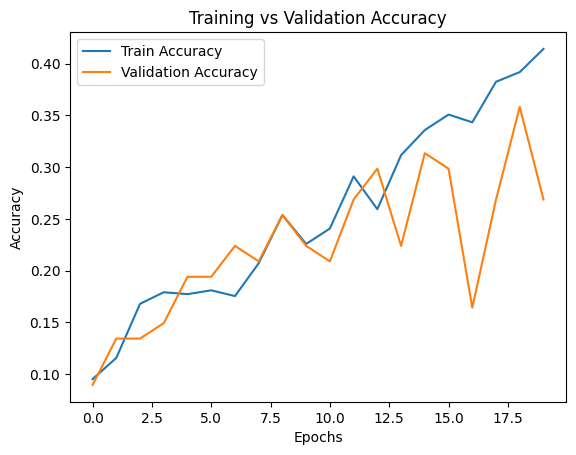

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# ✅ Load Processed Data
save_path = "/content/preprocessed_data"

X_train = np.load(f"{save_path}/X_train.npy")
y_train = np.load(f"{save_path}/y_train.npy")
X_val = np.load(f"{save_path}/X_val.npy")
y_val = np.load(f"{save_path}/y_val.npy")
X_test = np.load(f"{save_path}/X_test.npy")
y_test = np.load(f"{save_path}/y_test.npy")

# ✅ Check Shapes
print(f"Training Data Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data Shape: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test Data Shape: {X_test.shape}, Labels: {y_test.shape}")

# ✅ Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')  # Output Layer (11 classes)
])

# ✅ Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,  # Adjust based on training performance
    batch_size=32
)

# ✅ Save the Model
model.save("/content/musician_recognition_cnn.h5")
print("✅ Model training complete and saved!")

# ✅ Plot Training Performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [ ]:
import shutil

# Path where preprocessed data is stored in Colab
colab_data_path = "/content/preprocessed_data"

# Path where you want to save it in Drive
drive_data_path = "/content/drive/MyDrive/Indian_Musician_Project/preprocessed_data"

# Copy the entire folder
shutil.copytree(colab_data_path, drive_data_path, dirs_exist_ok=True)

print("✅ Preprocessed data saved to Drive!")

✅ Preprocessed data saved to Drive!
